In [15]:
import dbnomics
import os
import pandas as pd

# Coleta de dados ----

# Importar os dados da DBNOMICS (fonte Banco Mundial - WDI)
dados_brutos = dbnomics.fetch_series_by_api_link(
    api_link = "https://api.db.nomics.world/v22/series/WB/WDI?dimensions=%7B%22frequency%22%3A%5B%22A%22%5D%2C%22indicator%22%3A%5B%22FP.CPI.TOTL.ZG%22%5D%7D&facets=1&format=json&limit=1000&observations=1&q=wdi",max_nb_series = 9999999
    )


/home/eco/Analise_Macro/venv/lib/python3.12/site-packages/dbnomics/__init__.py:334: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(objs=dataframes, sort=False)


In [18]:
dados=dados_brutos.filter(items = ["period", "country (label)", "indicator (label)", "value"]).rename( columns = {
         "period": "data",
         "country (label)": "pais",
         "indicator (label)": "variavel",
         "value": "valor"
         }
     ).dropna()

In [28]:
brazil=dados.query('pais == "Brazil" and data >="2005"')
brazil.tail(2)

,data,pais,variavel,valor
62,2022-01-01,Brazil,"Inflation, consumer prices (annual %)",9.280106
63,2023-01-01,Brazil,"Inflation, consumer prices (annual %)",4.593563


<Axes: xlabel='data'>

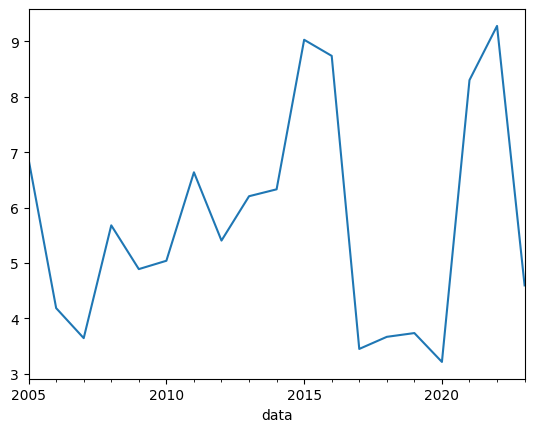

In [37]:
brazil_filter=brazil.assign(valor=lambda x:x.valor.astype(float),pais=lambda x:x.pais.astype(str)).set_index('data')
brazil_filter.valor.plot()
